In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [12]:
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
X=pd.concat([X,geography,gender],axis=1) 

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
# Splitting the dataset into Training set and Test Set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
X_train.shape

(8000, 11)

In [21]:
#creating the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [22]:
# initializing the artificial Neural Network
classifier=Sequential()

In [23]:
# Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [24]:
classifier

In [25]:
# adding the hidden layers
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [26]:
#  Adding the output layer
classifier.add(Dense(1,activation='sigmoid')) 
#since it is a binary classification problem we have used sigmoid as the activation function,
#if it is multiclass classification problem we can use softmax activation function
#for regression problem we can use relu activation function

In [27]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [28]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [29]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [30]:
# Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [31]:
X_train.shape

(8000, 11)

In [32]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 9s 8ms/step - loss: 0.4159 - accuracy: 0.8204 - val_loss: 0.3701 - val_accuracy: 0.8365
Epoch 2/100
800/800 [==============================] - 5s 6ms/step - loss: 0.3587 - accuracy: 0.8481 - val_loss: 0.3505 - val_accuracy: 0.8625
Epoch 3/100
800/800 [==============================] - 6s 7ms/step - loss: 0.3519 - accuracy: 0.8541 - val_loss: 0.3371 - val_accuracy: 0.8670
Epoch 4/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3490 - accuracy: 0.8568 - val_loss: 0.3306 - val_accuracy: 0.8630
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3460 - accuracy: 0.8618 - val_loss: 0.3281 - val_accuracy: 0.8655
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3447 - accuracy: 0.8580 - val_loss: 0.3338 - val_accuracy: 0.8680
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3422 - accuracy: 0.8602 - val_loss: 0.3347 - val_accuracy: 0.8585

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

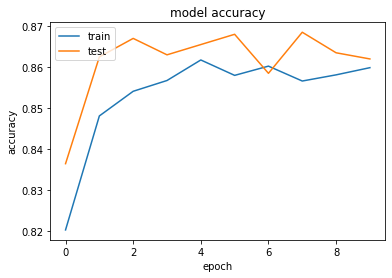

In [34]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

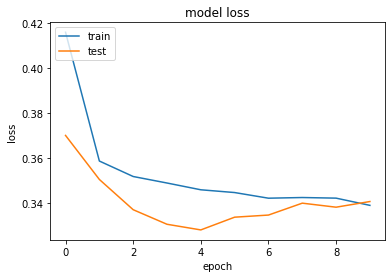

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [37]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1514,   81],
       [ 195,  210]])

In [38]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [39]:
score

0.862

In [40]:
# get the weights
classifier.get_weights()

[array([[-0.14672038,  0.5629875 , -0.17444417,  0.6287527 , -0.18119593,
          0.0402391 , -0.06519547,  0.03202321, -0.28345063,  0.65504754],
        [-0.9873101 ,  0.24401584, -0.3403014 , -0.09615231,  1.7395954 ,
          0.01813207, -2.382232  ,  1.6346997 ,  1.6354115 , -1.4813764 ],
        [ 0.29286706,  0.46194875, -0.5519513 ,  0.4357755 , -0.2850882 ,
         -0.15526395, -0.40146998, -0.07650237, -0.23080267,  0.05861061],
        [-1.8164011 , -1.3373299 , -0.60248876,  0.00349577,  0.20356645,
         -1.973849  , -0.4008083 ,  0.30555922, -0.47633204, -0.47838035],
        [-0.04890854, -0.20635232, -0.3829741 , -1.048089  , -1.749015  ,
         -2.2325    , -1.3493793 ,  2.2677174 , -0.57634234,  0.3551373 ],
        [-0.38690388,  0.26031545,  0.20187601, -0.15641865, -0.03491721,
         -0.06473943, -0.01620045, -0.06095117, -0.10202849,  0.32731813],
        [ 0.2272045 ,  0.39595905,  1.1241943 , -0.09126103, -0.549897  ,
          0.13353257,  0.2509259

In [41]:
# Saving h5 file
classifier.save('model.h5')

In [42]:
# loading h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [43]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.31544426],
       [0.22291635],
       [0.14644346],
       ...,
       [0.15008636],
       [0.21258909],
       [0.3144594 ]], dtype=float32)